## **Tensorflow Keras Neural Network Starter**

In this notebook we will create a simple neural network to classify types of clothing garments with Keras (sub module of TensorFlow).

In [38]:
# Imports
# import keras from tensorflow
from tensorflow import keras
# Numpy and Matplotlib libraries
import numpy as np
import matplotlib.pyplot as plot

**Dataset**

We will use MNIST Fashion dataset from Keras.

This dataset includes 60,000 images for training and 10,000 images for testing.

In [39]:
# load fashion_mnist dataset
garment_dataset = keras.datasets.fashion_mnist

# split data into testing and training
(train_images, train_image_labels), (test_images, test_image_labels) = garment_dataset.load_data()

In [40]:
# Shape of our data
train_images.shape
# train_image_labels.shape
# test_images.shape

(60000, 28, 28)

So we have got 60,000 images that are made up of 28 x 28 pixels that is 784 in total.

In [41]:
# View single image
train_images[58000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  43, 103,  14,
          0,   0,   0,  40, 134,  54,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  27, 210, 200, 220, 229,
        231, 244, 255, 149, 241, 193, 188, 155,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 168, 219, 194, 195, 211,
        232, 241, 233, 198, 182, 192, 191, 222, 122,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  12, 210, 203, 197, 198, 184,
        188, 194, 182, 178, 192, 191, 195, 201, 204,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  80, 217, 199, 201, 200, 187,
        188, 195, 190, 188, 192, 194, 197, 197, 201,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 139, 216, 204, 212, 199, 198,
        200, 202, 200, 202, 204, 189, 200, 203, 210,  51,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 192, 232, 234, 227, 198, 208,
        204, 207, 207, 202, 203, 183, 230, 223, 227, 172,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  67, 144, 234, 227, 200, 208,
        202, 202, 200, 203, 201, 189, 228, 206, 148,  48,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 224, 210, 201,
        203, 203, 204, 209, 198, 221, 132,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   4,   0,   0, 238, 210, 204,
        201, 204, 204, 204, 193, 221, 149,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2,   0,   0, 238, 208, 201,
        200, 202, 202, 203, 200, 203, 154,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,   0,   0, 199, 207, 206,
        210, 206, 206, 206, 202, 204, 165,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,   0,   0, 204, 209, 203,
        204, 198, 200, 202, 202, 206, 177,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2,   0,  14, 209, 204, 202,
        200, 208, 210, 209, 204, 207, 190,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   3,   0,  46, 217, 209, 216,
        213, 210, 206, 208, 210, 210, 226,   0,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   3,   0,  72, 207, 190, 194,
        204, 198, 209, 200, 180, 172, 190,   6,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,   0, 109, 208, 189, 188,
        202, 208, 211, 198, 181, 171, 201,  28,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 151, 209, 192, 193,
        206, 206, 210, 195, 171, 177, 182,  63,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 183, 206, 195, 199,
        208, 206, 210, 201, 163, 171, 188,  93,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 202, 208, 197, 199,
        203, 204, 209, 202, 165, 172, 190, 115,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 204, 204, 181, 189,
        199, 203, 209, 202, 159, 163, 187, 133,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 202, 218, 204, 212,
        208, 208, 208, 210, 203, 198, 212, 167,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 199, 219, 206, 208,
        202, 206, 206, 208, 207, 203, 213, 157,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 192, 220, 206, 208,
        207, 206, 206, 208, 207, 202, 216, 141,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Our image is in grey scale because our pixel values are between 0(Black) and 255(White)

In [42]:
# View single pixel
train_images[48000, 20, 24]

194

Obtain unique numeric labels from our dataset and assign string labels for our reference

In [43]:
np.unique(train_image_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

We have got 10 unique labels

In [44]:
# Taken from keras documentation
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Visualizing the images

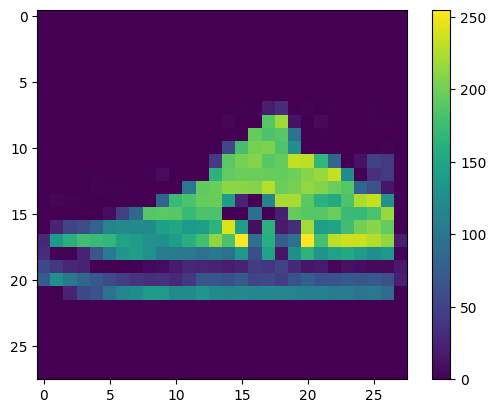

In [46]:
# Plotting the image
plot.imshow(train_images[49999])
# Color bar
plot.colorbar()
plot.show()

**Data Preprocessing**

The last step before creating our model is to preprocess our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.

In [47]:
processed_train_images = train_images / 255.0

processed_test_images = test_images / 255.0

**Building the Model**

 We are using keras sequential model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right)

In [48]:
garmentModel = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

Input Layer(1): It consist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

Hidden Layer(2): This is our first and only hidden layer. The dense denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

Output Layer(3): This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function softmax is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

**Compile the Model**

To compile a model we need to define the loss function, optimizer and metrics we would like to track.

In [49]:
# We can try out different optimizer and loss algorithms from Keras documentation
garmentModel.compile(
              optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

**Training the Model**

In [50]:
# Fit method is used for training
# Epochs - number of times the model sees the data
#  (More number of epochs does not yield best results)
garmentModel.fit(processed_train_images, train_image_labels, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4994 - accuracy: 0.8242
Epoch 2/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3739 - accuracy: 0.8649
Epoch 3/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3333 - accuracy: 0.8781
Epoch 4/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3121 - accuracy: 0.8859
Epoch 5/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2905 - accuracy: 0.8921
Epoch 6/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2772 - accuracy: 0.8969
Epoch 7/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2650 - accuracy: 0.9020
Epoch 8/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2550 - accuracy: 0.9040


**Evaluating the Model**

In [51]:
# Verbose - 0 (Silent) 1(Show progress bar)
test_loss, test_accuracy = garmentModel.evaluate(processed_test_images,  test_image_labels, verbose=1)

print('Test accuracy:', test_accuracy)
print('Test Loss:', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.3233 - accuracy: 0.8845
Test accuracy: 0.8845000267028809
Test Loss: 0.32331767678260803


We can see that the accuracy is lower than when training the model. This difference is referred to as overfitting.

**Prediction**

In [52]:
# This method returns to us an array of predictions for each image we passed it
# Prediction values for the label names
garmentPrediction = garmentModel.predict(processed_test_images)
# Prediction for image 1.
garmentPrediction[0]

313/313 [==============================] - 1s 2ms/step


array([1.3666440e-05, 5.2249682e-08, 7.8759131e-06, 9.8258212e-08,
       1.4274962e-05, 3.4304172e-02, 3.3097617e-06, 3.1142062e-02,
       4.4118442e-06, 9.3451005e-01], dtype=float32)

To get the value with the highest score we can use numpy funtion argmax() to get the index of the maximium value from a numpy array.

In [53]:
np.argmax(garmentPrediction[0])

9

We can validate this by looking at the value of the corresponding test label.

In [54]:
test_image_labels[0]

9

Visual representation of the prediction

Test Image Label -  Ankle boot


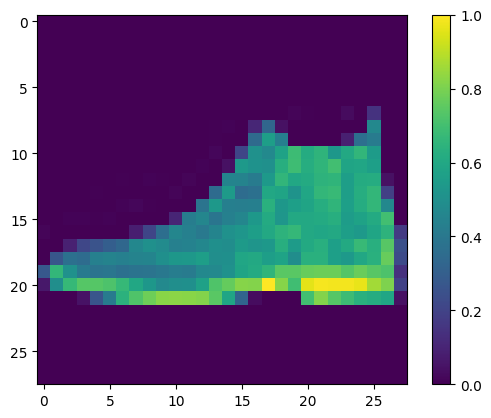

Predicted Image Label -  Ankle boot


In [55]:
firstTestImageLabelIndex = test_image_labels[0]
print('Test Image Label - ', label_names[firstTestImageLabelIndex])

# Plotting the image
plot.imshow(processed_test_images[0]) # Zero index because we are taking garmentPrediction[0]
# Color bar
plot.colorbar()
plot.show()

predictedImageIndex = np.argmax(garmentPrediction[0])
print('Predicted Image Label - ', label_names[predictedImageIndex])

**Sources**

1. “Keras: The Python Deep Learning Library.” Home - Keras Documentation, www.keras.io/.
2. “Basic Classification: Classify Images of Clothing  :   TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/keras/classification.
3. "Machine Learning with Python", https://www.freecodecamp.org/learn/machine-learning-with-python